In [3]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import testfunctions

In [5]:
def sin(x):
    return jnp.sin(2*x[0] + x[1])

In [6]:
names = ["franke", "himmelblau", "easom", "ackley", "sin"]

optimizers = ["L-BFGS-B", "TNC", "SLSQP"]

functions = [testfunctions.franke, testfunctions.himmelblau, testfunctions.easom, testfunctions.ackley, sin]

ranges = [(jnp.array([0.0,1.0]), jnp.array([0.0,1.0])), 
          (jnp.array([-5.0,5.0]), jnp.array([-5.0,5.0])),
          (jnp.array([-10.0,10.0]), jnp.array([-10.0,10.0])),
          (jnp.array([-5.0,5.0]), jnp.array([-5.0,5.0])),
          (jnp.array([0.0,2*jnp.pi]), jnp.array([0.0,2*jnp.pi]))]


num_gridpoints = jnp.array([100,100])

In [33]:
def fun(Y, mean, std):
    counts = jnp.where(jnp.abs(Y-mean) <= std, 0, 1)
    return counts, jnp.sum(counts)

In [34]:
X, Y = testfunctions.create_training_data_2D(0, num_gridpoints, ranges[-1], 0.0, sin)
Y = Y[:,0]

means = jnp.load("./prediction_files/sinmeansL-BFGS-B.npz")
stds = jnp.load("./prediction_files/sinstdL-BFGS-B.npz")

In [35]:
for name, arr in means.items():
    print(name, arr.shape)


arr_0 (10000,)
arr_1 (10000,)
arr_2 (10000,)
arr_3 (10000,)
arr_4 (10000,)


In [36]:
counts, sum = fun(Y, means["arr_0"], stds["arr_0"])

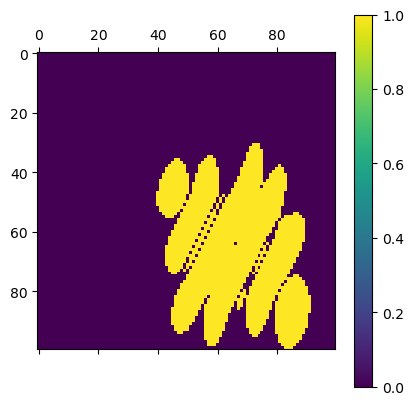

In [39]:
plt.matshow(counts.reshape(100,100))
plt.colorbar()